# Coupled quantum kicked top Husimi plot

$H = H_1 + H_2 + H_{12}$

$H_1=\alpha J_{1z} +\frac{k}{2J_1}J_{1y}^2\sum_{n=-\infty}^{\infty}\delta(t-n\tau)$

$H_{12}=\frac{Δ_{12}}{2\sqrt{J_1J_2}}J_{1y}J_{2y}\sum_{n=-\infty}^{\infty}\delta(t-n\tau)$

$U_{1} = exp(-i\frac{k}{2J_1}J_{1y}^2)\cdot exp(-i\alpha J_{1z})$

$U_{12} = exp({-i\frac{\Delta_{12}}{2\sqrt{J_1J_2}}J_{1y}J_{2y}})$

$U=U_{12}(U_1\otimes U_2)$

Related papers:

[2]: Herrmann, Tabea, et al. "Entanglement in coupled kicked tops with chaotic dynamics." Physical Review E 101.2 (2020): 022221.[https://link.aps.org/doi/10.1103/PhysRevE.101.022221](https://link.aps.org/doi/10.1103/PhysRevE.101.022221).
 
[3]: Miller PA, Sarkar S. Signatures of chaos in the entanglement of two coupled quantum kicked tops. Phys Rev E Stat Phys Plasmas Fluids Relat Interdiscip Topics. 1999 Aug;60(2 Pt A):1542-50. [https://doi: 10.1103/physreve.60.1542. PMID: 11969915](https://doi.org/10.1103/physreve.60.1542).

In [1]:
# Importing libraries
using QuantumOptics
using PyPlot
using SparseArrays
using LinearAlgebra

In [2]:
#----------------------------------
# Parameters
k1 = 30;
k2 = k1;
j1 = 15;
j2 = j1;
α = π/2
ϵpow= 14; ϵ = 10.0^(-ϵpow) #precision
Δ12 =1 #coupling term
#----------------------------------

# Basis
b1 = SpinBasis(j1)
b2 = SpinBasis(j2)

# Operator creation
Jy1 = 0.5*sigmay(b1)
Jz1 = 0.5*sigmaz(b1)

Jy2 = 0.5*sigmay(b2)
Jz2 = 0.5*sigmaz(b2)

Operator(dim=31x31)
  basis: Spin(15)sparse([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  22, 23, 24, 25, 26, 27, 28, 29, 30, 31], ComplexF64[15.0 + 0.0im, 14.0 + 0.0im, 13.0 + 0.0im, 12.0 + 0.0im, 11.0 + 0.0im, 10.0 + 0.0im, 9.0 + 0.0im, 8.0 + 0.0im, 7.0 + 0.0im, 6.0 + 0.0im  …  -6.0 + 0.0im, -7.0 + 0.0im, -8.0 + 0.0im, -9.0 + 0.0im, -10.0 + 0.0im, -11.0 + 0.0im, -12.0 + 0.0im, -13.0 + 0.0im, -14.0 + 0.0im, -15.0 + 0.0im], 31, 31)

In [7]:
# Floquet operators
# U1 for j=j1
U1 = exp(dense(-1im*k1*Jy1*Jy1/(2*(j1+1/2))))*exp(dense(-1im*α*Jz1));
U1.data[abs.(U1.data) .< ϵ] .= 0 # If matrix element is bellow ϵ;
U1=sparse(U1) # making it sparse matrix.
#n = nnz(U1.data)
#println("Number of non zero elements in U1 are $n")

# U2 for j=j2
U2 = exp(dense(-1im*k2*Jy2*Jy2/(2*(j2+1/2))))*exp(dense(-1im*α*Jz2));
U2.data[abs.(U2.data) .< ϵ] .= 0 # If matrix element is bellow ϵ;
U2=sparse(U2) # making it sparse matrix.
#n = nnz(U2.data)
#println("Number of non zero elements in U2 are $n")

# U12 Floquet for coupling term
U12 = exp(dense(-1im * Δ12*(Jy1⊗Jy2) / (2 * (j1 + 1/2) * (j2 + 1/2))));
U12.data[abs.(U12.data) .< ϵ] .= 0 # If matrix element is bellow ϵ;
U12=sparse(U12) # making it sparse matrix.
#n = nnz(U12.data)
#println("Number of non zero elements in U12 are $n")




# Unitary floquet operator of whole system
U = U12*(U1 ⊗ U2)


Operator(dim=961x961)
  basis: [Spin(15) ⊗ Spin(15)]sparse([1, 3, 5, 7, 9, 11, 13, 15, 17, 19  …  943, 945, 947, 949, 951, 953, 955, 957, 959, 961], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  961, 961, 961, 961, 961, 961, 961, 961, 961, 961], ComplexF64[0.01255752031447037 - 0.02628069380102527im, 0.05253555891023614 + 0.0264401404425856im, 0.03389444350336194 + 0.0371645712371097im, 0.02359313981025664 + 0.04390600929661744im, 0.02294332313134904 + 0.04302537574119171im, 0.0261555913860681 + 0.03754423546312824im, 0.0296413944641292 + 0.03034557055865835im, 0.0303197112060339 + 0.01954334420416812im, 0.02751235024587732 + 0.00325910599323433im, 0.02312032775662564 - 0.01460083691754458im  …  0.02312032775662446 - 0.01460083691754527im, 0.02751235024587656 + 0.00325910599323321im, 0.03031971120603354 + 0.01954334420416625im, 0.02964139446412917 + 0.03034557055865644im, 0.0261555913860684 + 0.03754423546312608im, 0.02294332313134959 + 0.04302537574118966im, 0.02359313981025706 + 0.04390600929661

### Schrodinger evolution of the system

Let's take initial state is a spin coherent state for both subsystems.

Here **measuring of the entanglement** is also included.
1. We plot Von Neumann entropy of the reduced density matrix of one of the sub-systems.

In [8]:
# Initial coherent spin state
θ = π/2
ϕ = π/2
ψ1 = coherentspinstate(b1,θ,ϕ)
ψ2 = coherentspinstate(b2,θ,ϕ)
ψ = (ψ1⊗ψ2)
ψ.data[abs.(ψ.data) .< ϵ] .= 0 # If matrix element is bellow ϵ;

#----------------------------------
kicks = 100
#----------------------------------
# Stroboscopic Floquet dynamics
ψt = ψ;
time = zeros(1,kicks)
st = zeros(1,kicks) # contain Von Neumann entropy at different time
for i=1:kicks
    ρ_red = ptrace(ψt ⊗ dagger(ψt), 1)
    st[1,i] = entropy_vn(ρ_red)/log(2)
    time[1,i] = i
    ψt = normalize(U*ψt)
end # ψt is a tensor product format.

# Now we make ψt as state of a combine system(i.e. single system)
#
# Here j is from, (2j+1)=(2j1+1)((2j2+1))
j=(j1+j2)+2*j1*j2

b=SpinBasis(j)

# state ψt is state for spin j. where (2j+1)=(2j1+1)((2j2+1))
ψt = Ket(b,ψt.data);

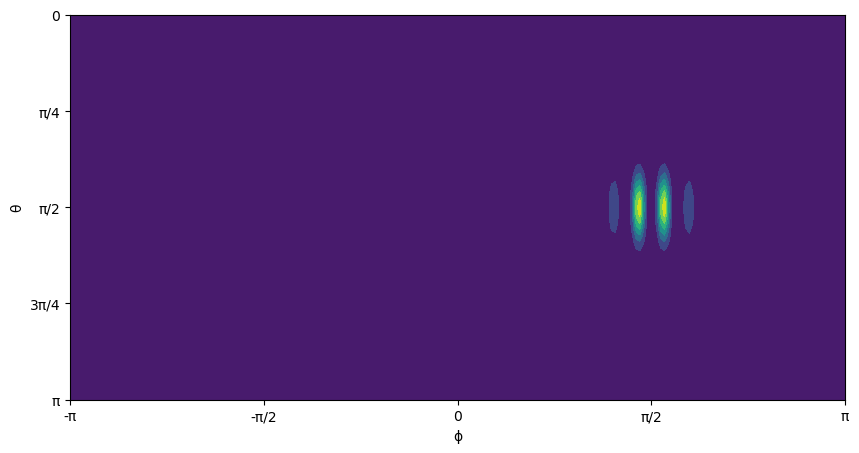

PyObject Text(0.5, 24.0, 'ϕ')

In [9]:
# Husimi plot of ψ.

# ψ notation not used directly. 
#ψ is (2j1+1)⊗((2j2+1)). ψ0 is (2j1+1)⊗((2j2+1))
ψ0 = Ket(b,ψ.data) 

# SU(2) Q function
res = 110 # resolution of the SU(2) Q function
figure(figsize=(10,5))
wx=collect(range(-π, stop=π, length=2res))#[-1pi:pi/(res):1pi;]
wy=collect(range(0, stop=π, length=res))#[0:1pi/(res):1pi;]

qsu2=qfuncsu2(ψ0,res)
contourf(wx,wy,qsu2)

# appealing plot :-)
yticks([0.0, pi/4,pi/2,3pi/4,pi], ["π","3π/4","π/2","π/4",0] ) # North pole means θ = 0
xticks([-π,-π/2,0,π/2,π],["-π","-π/2",0,"π/2","π"] ) 
ylabel("θ")
xlabel("ϕ")

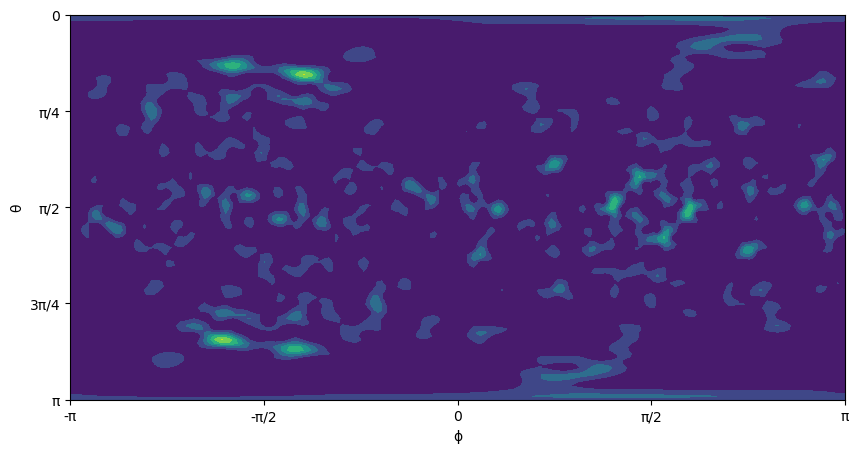

PyObject Text(0.5, 24.0, 'ϕ')

In [10]:
# Husimi plot of ψt.

figure(figsize=(10,5))
qsu2final=qfuncsu2(ψt,res)
contourf(wx,wy,qsu2final)

# appealing plot :-)
yticks([0.0, pi/4,pi/2,3pi/4,pi], ["π","3π/4","π/2","π/4",0] ) # North pole means θ = 0
xticks([-π,-π/2,0,π/2,π],["-π","-π/2",0,"π/2","π"] ) 
ylabel("θ")
xlabel("ϕ")


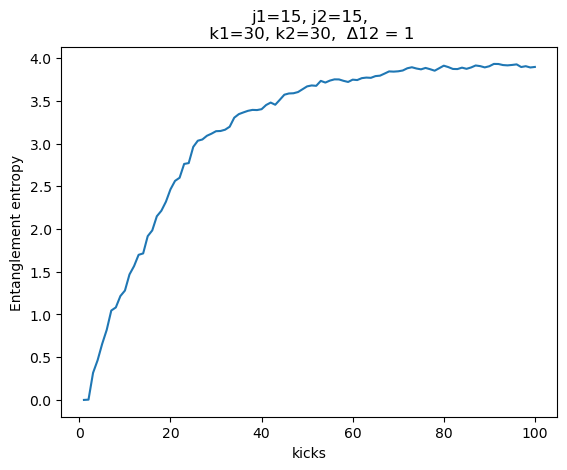

PyObject Text(0.5, 1.0, 'j1=15, j2=15,\n k1=30, k2=30,  Δ12 = 1')

In [14]:
# plot time vs Entanglement Entropy

plot(time', st')
xlabel("kicks")
ylabel("Entanglement entropy")
title("j1=$j1, j2=$j2,\n k1=$k1, k2=$k2,  Δ12 = $Δ12")